In [1]:
import pandas as pd
import numpy as np 
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load data
data = pd.read_csv('AirQualityUCI.csv', sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
#check if any missing values
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [5]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [6]:
#drop columns that are empty
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [7]:
# display NaN values
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop NaN values
data = data.dropna()
data.shape

(9357, 15)

In [9]:
#Below steps are to convert date and time as index of the dataframe
#list the current index of data
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=9357)

In [10]:
#Combine "Date" and "Time" columns
data.loc[:,'Datetime'] = data['Date'] + ' ' + data['Time']

# Convert data type from sring to datetime
# new values saved in DateTime
from datetime import datetime
DateTime = []
for x in data['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))
#convert DateTime to datetime series, and set it as index of data 
datetime = pd.Series(DateTime)
data.index = datetime
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",10/03/2004 18.00.00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",10/03/2004 19.00.00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",10/03/2004 20.00.00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",10/03/2004 21.00.00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",10/03/2004 22.00.00


In [11]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [12]:
#we notice that min value for each variables are -200, which is the tag used for missing values
#create a new dataframe with -200 replaced by NaN
data_w_nan = data.replace(-200, np.nan)
data_w_nan.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,8991.000000,914.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000
mean,1099.833166,218.811816,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128
std,217.080037,204.459921,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288
min,647.000000,7.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,937.000000,67.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000
50%,1063.000000,150.000000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000
75%,1231.000000,297.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [13]:
#check again for missing values
data_w_nan.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
Datetime            0
dtype: int64

In [14]:
data_w_nan.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Datetime          object
dtype: object

In [15]:
#by looking at the .xlsx format datasheet, we can confirm the non-datetime variables should be in float data type as well
#the following steps are to convert them to float data type
#repace "," with ".", and convert to numeric
data_w_nan['CO(GT)'] = data_w_nan['CO(GT)'].str.replace(',', '.').astype(float)
data_w_nan['C6H6(GT)'] = data_w_nan['C6H6(GT)'].str.replace(',','.').astype(float)
data_w_nan['T'] = data_w_nan['T'].str.replace(',', '.').astype(float)
data_w_nan['RH'] = data_w_nan['RH'].str.replace(',', '.').astype(float)
data_w_nan['AH'] = data_w_nan['AH'].str.replace(',', '.').astype(float)

In [17]:
#replace -200 with NaN if any.
data_w_nan = data_w_nan.replace(-200, np.nan)
data_w_nan.describe()
#data_w_nan is a clean data set to use with missing values (NaN)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [18]:
#Generate target variables, S1 - S5
#drop missing values if any
S1 = data_w_nan['PT08.S1(CO)'].dropna()
S2 = data_w_nan['PT08.S2(NMHC)'].dropna()
S3 = data_w_nan['PT08.S3(NOx)'].dropna()
S4 = data_w_nan['PT08.S4(NO2)'].dropna()
S5 = data_w_nan['PT08.S5(O3)'].dropna()

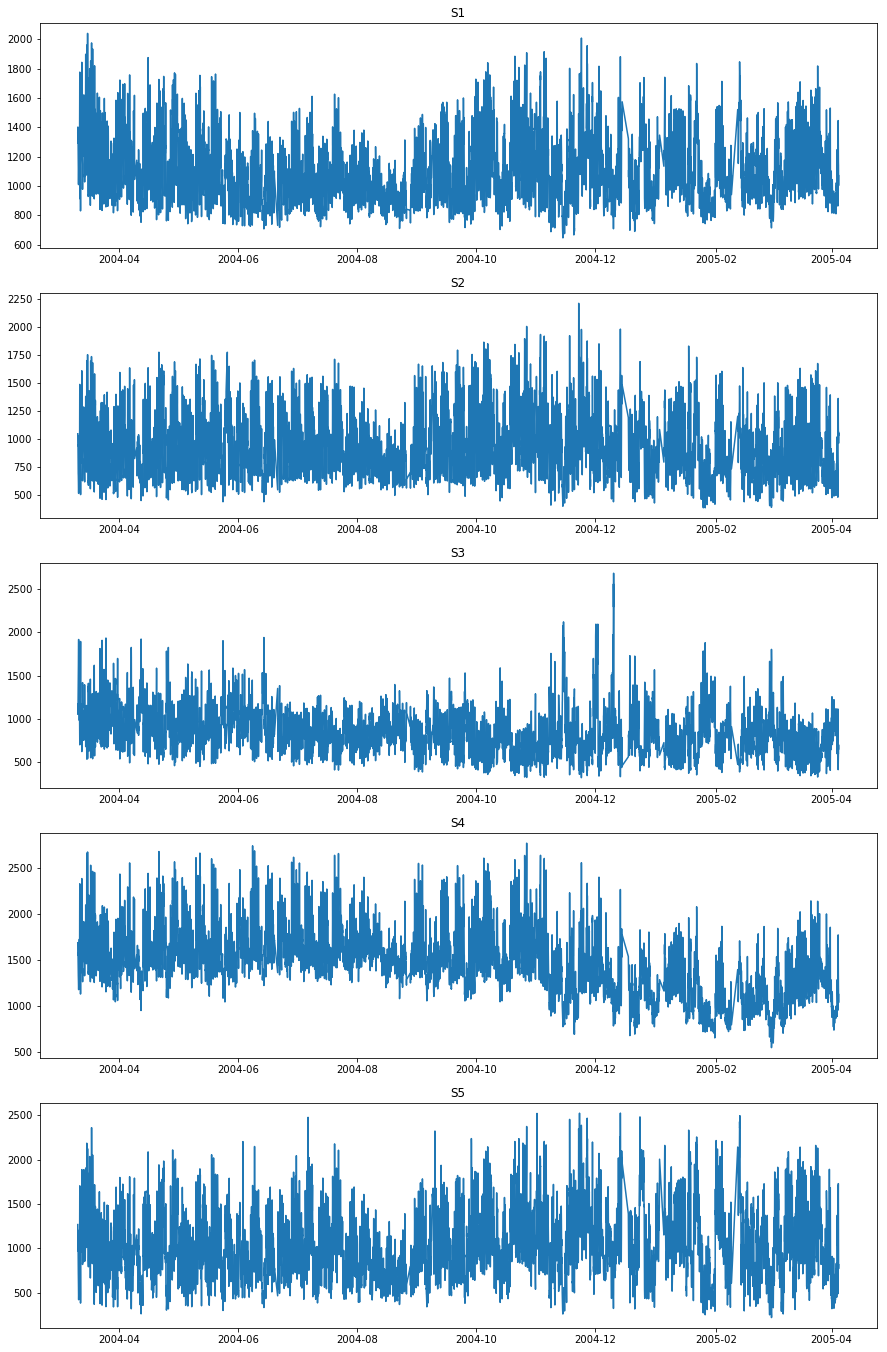

In [20]:
#Plots of original observations, S1-S5
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')

SyntaxError: invalid syntax (<ipython-input-20-6f0eebb25f8c>, line 3)

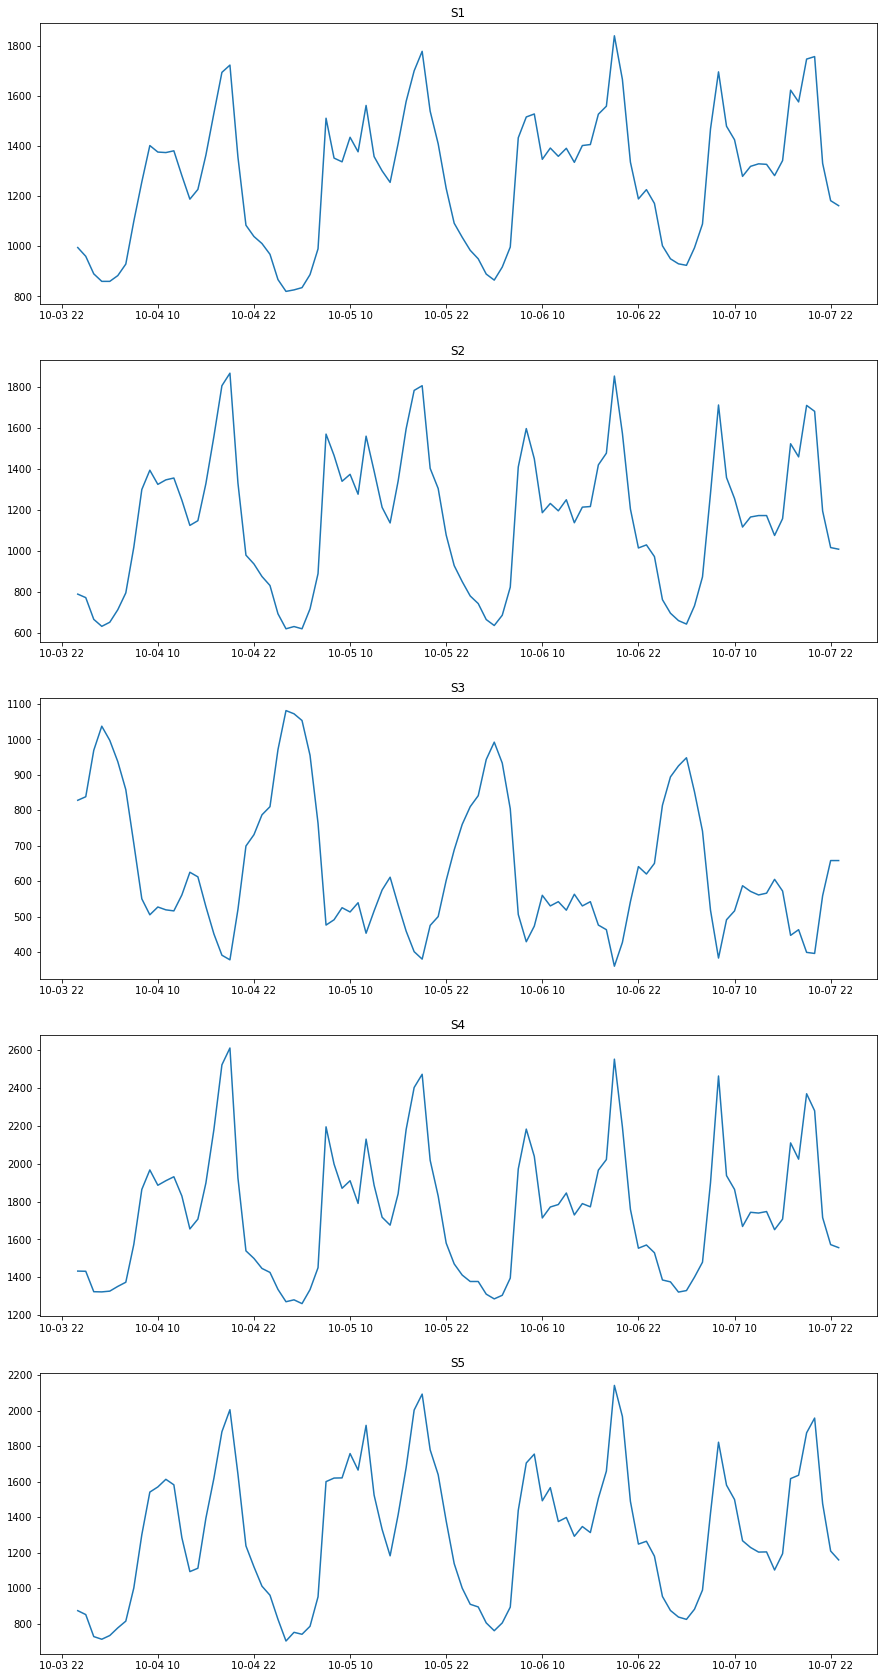

In [22]:
#Plot by hour, '2004-10-04' - '2004-10-07', 5 chemicals
fig, axes = plt.subplots(5,1, figsize=(15,30))

axes[0].plot(S1['2004-10-04':'2004-10-07'])
axes[0].set_title ('S1')
axes[1].plot(S2['2004-10-04':'2004-10-07'])
axes[1].set_title ('S2')
axes[2].plot(S3['2004-10-04':'2004-10-07'])
axes[2].set_title ('S3')
axes[3].plot(S4['2004-10-04':'2004-10-07'])
axes[3].set_title ('S4')
axes[4].plot(S5['2004-10-04':'2004-10-07'])
axes[4].set_title ('S5')

In [23]:
S1_lagged = S1.shift()
pd.DataFrame({'real': S1, 'lagged': S1_lagged}).corr()

,lagged,real
lagged,1.000000,0.883988
real,0.883988,1.000000


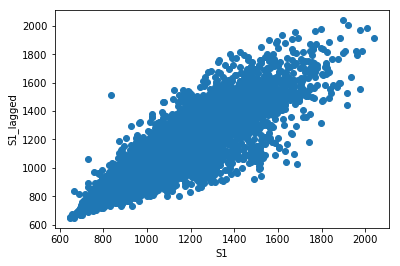

In [24]:
plt.scatter(S1, S1_lagged)
plt.xlabel('S1')
plt.ylabel('S1_lagged')

In [25]:
S2_lagged = S2.shift()
pd.DataFrame({'real': S2, 'lagged': S2_lagged}).corr()

,lagged,real
lagged,1.000000,0.867403
real,0.867403,1.000000


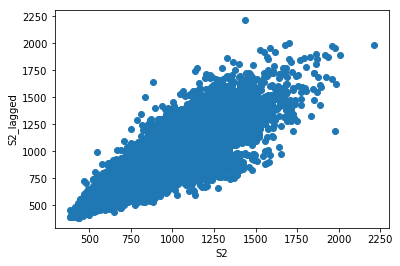

In [26]:
plt.scatter(S2, S2_lagged)
plt.xlabel('S2')
plt.ylabel('S2_lagged')

In [27]:
S3_lagged = S3.shift()
pd.DataFrame({'real': S3, 'lagged': S3_lagged}).corr()

,lagged,real
lagged,1.000000,0.906436
real,0.906436,1.000000


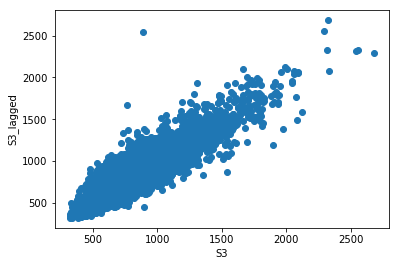

In [28]:
plt.scatter(S3, S3_lagged)
plt.xlabel('S3')
plt.ylabel('S3_lagged')

In [29]:
S4_lagged = S4.shift()
pd.DataFrame({'real': S4, 'lagged': S4_lagged}).corr()

,lagged,real
lagged,1.000000,0.910678
real,0.910678,1.000000


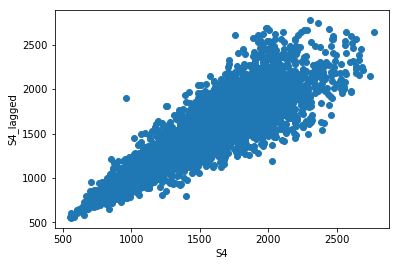

In [30]:
plt.scatter(S4, S4_lagged)
plt.xlabel('S4')
plt.ylabel('S4_lagged')

In [31]:
S5_lagged = S5.shift()
pd.DataFrame({'real': S5, 'lagged': S5_lagged}).corr()

,lagged,real
lagged,1.000000,0.899145
real,0.899145,1.000000


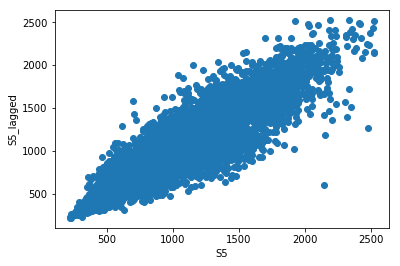

In [32]:
plt.scatter(S5, S5_lagged)
plt.xlabel('S5')
plt.ylabel('S5_lagged')

In [33]:
pd.DataFrame({'S1': S1, 'S2': S2, 'S3': S3, 'S4': S4, 'S5':S5}).corr()

,S1,S2,S3,S4,S5
S1,1.000000,0.892964,-0.771938,0.682881,0.899324
S2,0.892964,1.000000,-0.796703,0.777254,0.880578
S3,-0.771938,-0.796703,1.000000,-0.538468,-0.796569
S4,0.682881,0.777254,-0.538468,1.000000,0.591144
S5,0.899324,0.880578,-0.796569,0.591144,1.000000


In [35]:
from statsmodels.tsa.stattools import acf, pacf

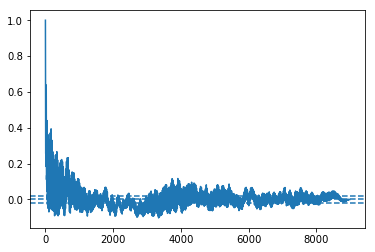

In [36]:
S1_acf = acf(S1, nlags=9000)
plt.plot(S1_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S1)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S1)), linestyle='--')

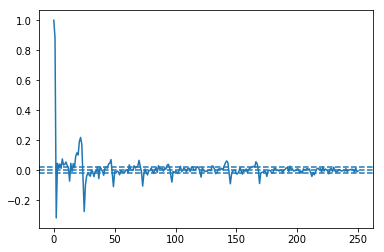

In [37]:
S1_pacf = pacf(S1, nlags=250)
plt.plot(S1_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S1)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S1)), linestyle='--')

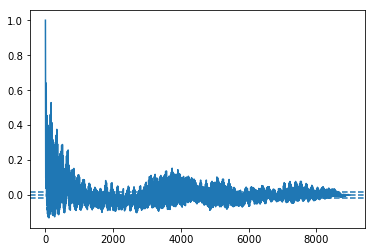

In [38]:
S2_acf = acf(S2, nlags=9000)
plt.plot(S2_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S2)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S2)), linestyle='--')

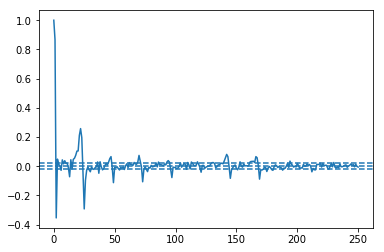

In [39]:
S2_pacf = pacf(S2, nlags=250)
plt.plot(S2_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S2)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S2)), linestyle='--')

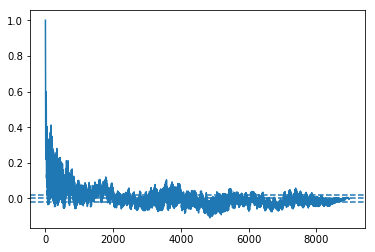

In [40]:
S3_acf = acf(S3, nlags=9000)
# S1_pacf = pacf(S1, nlags=1500)
plt.plot(S3_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S3)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S3)), linestyle='--')

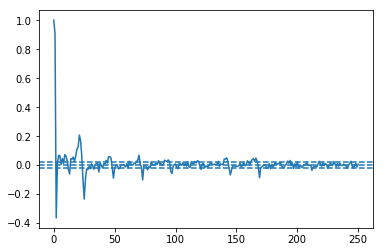

In [41]:
S3_pacf = pacf(S3, nlags=250)
plt.plot(S3_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S3)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S3)), linestyle='--')

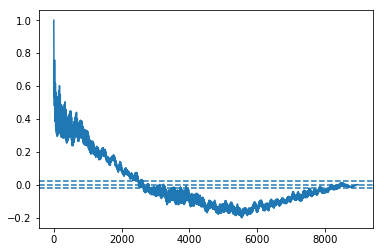

In [42]:
S4_acf = acf(S4, nlags=9000)
plt.plot(S4_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S4)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S4)), linestyle='--')

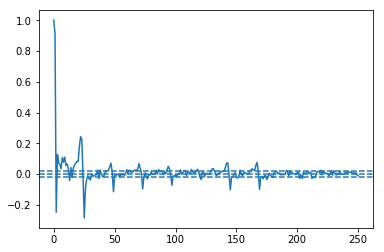

In [43]:
S4_pacf = pacf(S4, nlags=250)
plt.plot(S4_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S4)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S4)), linestyle='--')

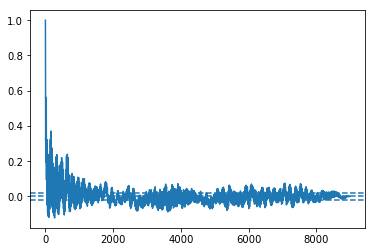

In [44]:
S5_acf = acf(S5, nlags=9000)
plt.plot(S5_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S5)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S5)), linestyle='--')

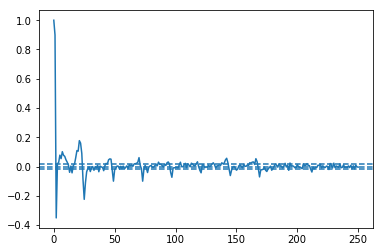

In [45]:
S5_pacf = pacf(S5, nlags=250)
plt.plot(S5_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.84/np.sqrt(len(S5)), linestyle='--')
plt.axhline(y=1.84/np.sqrt(len(S5)), linestyle='--')

In [49]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(S1, order=(25, 0, 0))  
# results_AR = model.fit(disp=-1)  
# plt.plot(S1)
# plt.plot(results_AR.fittedvalues, color='red')